## Installs

In [11]:
%pip install keras
%pip install tensorflow
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Raviv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Raviv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Raviv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Raviv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Raviv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Raviv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


## Imports

In [27]:
from keras.models import Model, load_model
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
from os import getcwd
from os.path import join
from skimage.transform import resize

## Declarations

In [28]:
# base_dir = join(getcwd(), "chest_xray")
base_dir = "/Users/neriya.shulman/content/chest_xray"

## Loading the model Q1_a

In [29]:
def load_q1_a_model():
    return load_model('model_q1_a.keras')

q1_a_model = load_q1_a_model()

ValueError: File not found: filepath=model_q1_a.keras. Please ensure the file is an accessible `.keras` zip file.

## Play with filters

### Mutual code for both layers

In [7]:
def get_layer_filters(model, layer_name: str) -> list:
    lst = []
    specific_layer = model.get_layer(layer_name)
    filters, biases = specific_layer.get_weights()
    for idx2 in range(filters.shape[3]):
        x = filters[:, :, :, idx2]
        lst.append(x)
    return lst

### First layer filters

In the first layer, there are 32 filters (kernels), Each filter is 3x3 greyscale, i.e. 9 pixels.

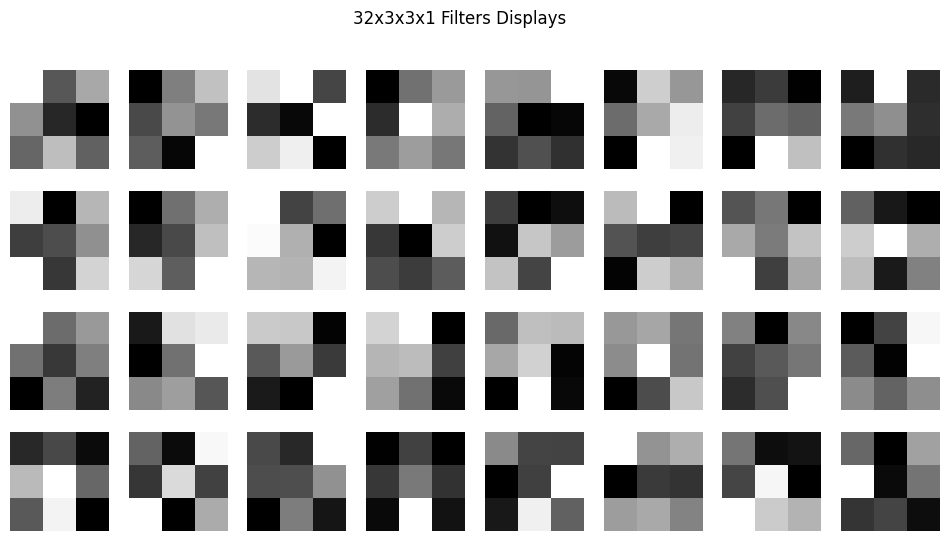

In [8]:
def display_first_layer_filters(filters_list: list) -> None:
    lst_width = 8
    lst_height = int(len(filters_list) / lst_width)
    fig, ax = plt.subplots(lst_height, lst_width, figsize=(12, 6))
    fig.suptitle(f"{len(filters_list)}x{'x'.join((str(b) for b in filters_list[0].shape))} Filters Displays")
    for i in range(lst_height):
        for j in range(lst_width):
            ax[i, j].imshow(filters_list[i * lst_width + j], cmap='gray')
            ax[i, j].axis('off')
    plt.show()

display_first_layer_filters(get_layer_filters(q1_a_model, "conv2d"))

### Second layer filters

In the second layer, the transform dimensions are 64 3D arrays, each is 3x3 with depth of 32. The representation is that the 3x3 had been connected 32 times. then, displaying it for 64 rows.

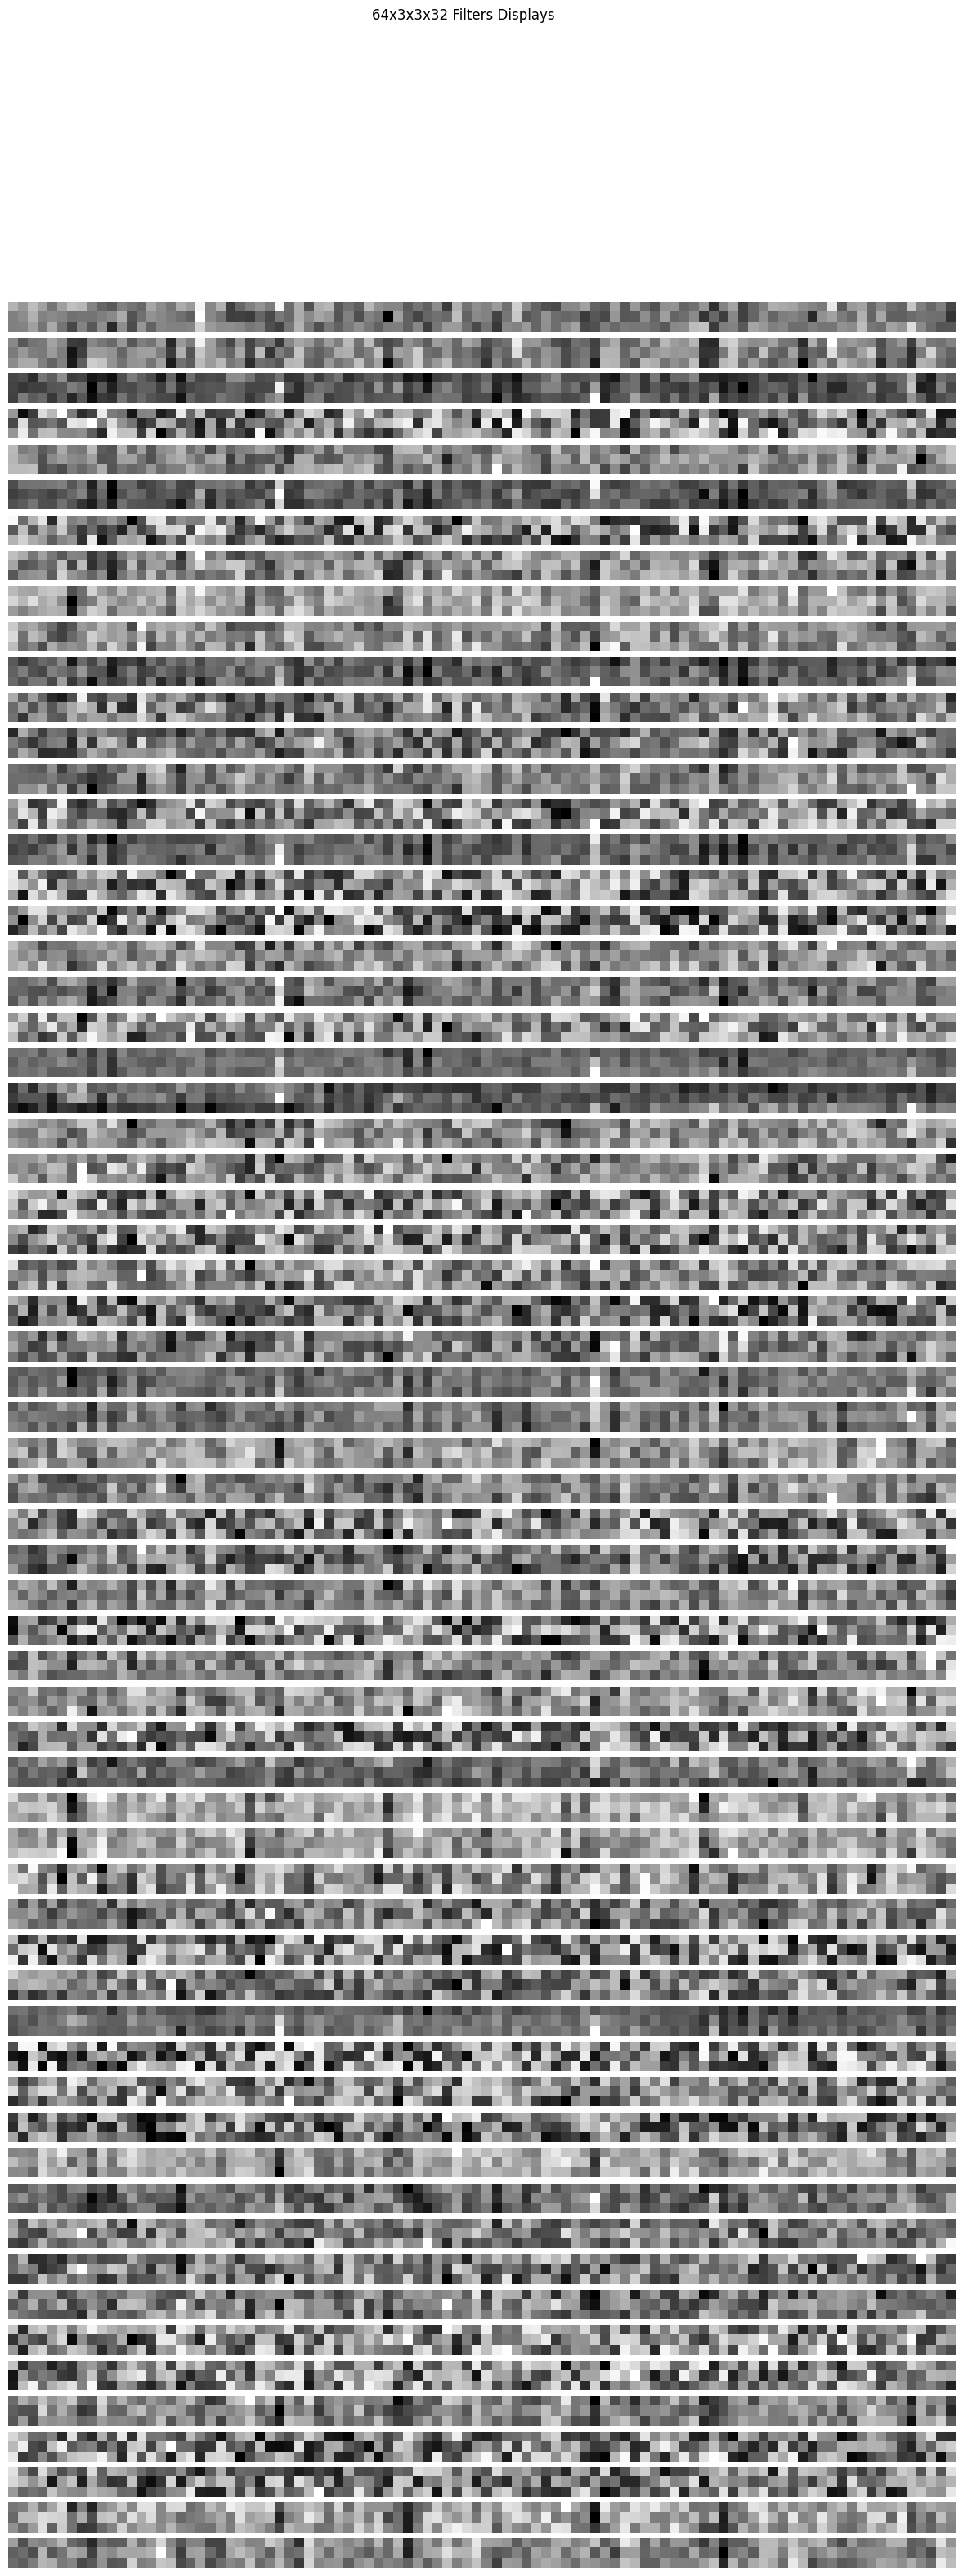

In [9]:
def display_seconds_layer_filters(filters_list: list) -> None:
    lst = []
    for pic in filters_list:
        lst.append(np.concatenate(pic, axis=1))

    fig, ax = plt.subplots(len(lst), 1, figsize=(18, 36))
    fig.suptitle(f"{len(lst)}x{'x'.join((str(b) for b in filters_list[0].shape))} Filters Displays")
    for i, pic in enumerate(lst):
        ax[i].imshow(pic, cmap='gray')
        ax[i].axis('off')
    plt.show()

display_seconds_layer_filters(get_layer_filters(q1_a_model, "conv2d_1"))

## Play with layers outputs

### Mutual code for both layers

In [10]:
def display_layer_outputs_of_image(model, img_path: str, layer_name: str) -> None:
    layer_outputs = model.get_layer(layer_name).output
    activation_model = Model(inputs=model.inputs[0], outputs=layer_outputs)

    img = load_img(img_path, target_size=(250, 250)).convert('L')
    img_tensor = img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    activations = activation_model.predict(img_tensor)
    layer_activation = activations[0]

    width_size = 8
    height_size = int(layer_activation.shape[2] / width_size)

    fig, ax = plt.subplots(height_size, width_size, figsize=(width_size * 3, height_size * 3))
    fig.suptitle(f"Display output of layer {layer_name}")
    for height_idx in range(height_size):
        for width_idx in range(width_size):
            ax[height_idx, width_idx].imshow(layer_activation[:, :, height_idx * width_size + width_idx] * 255.,
                                             cmap='gray')
            ax[height_idx, width_idx].axis('off')
    plt.show()

### First layer outputs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


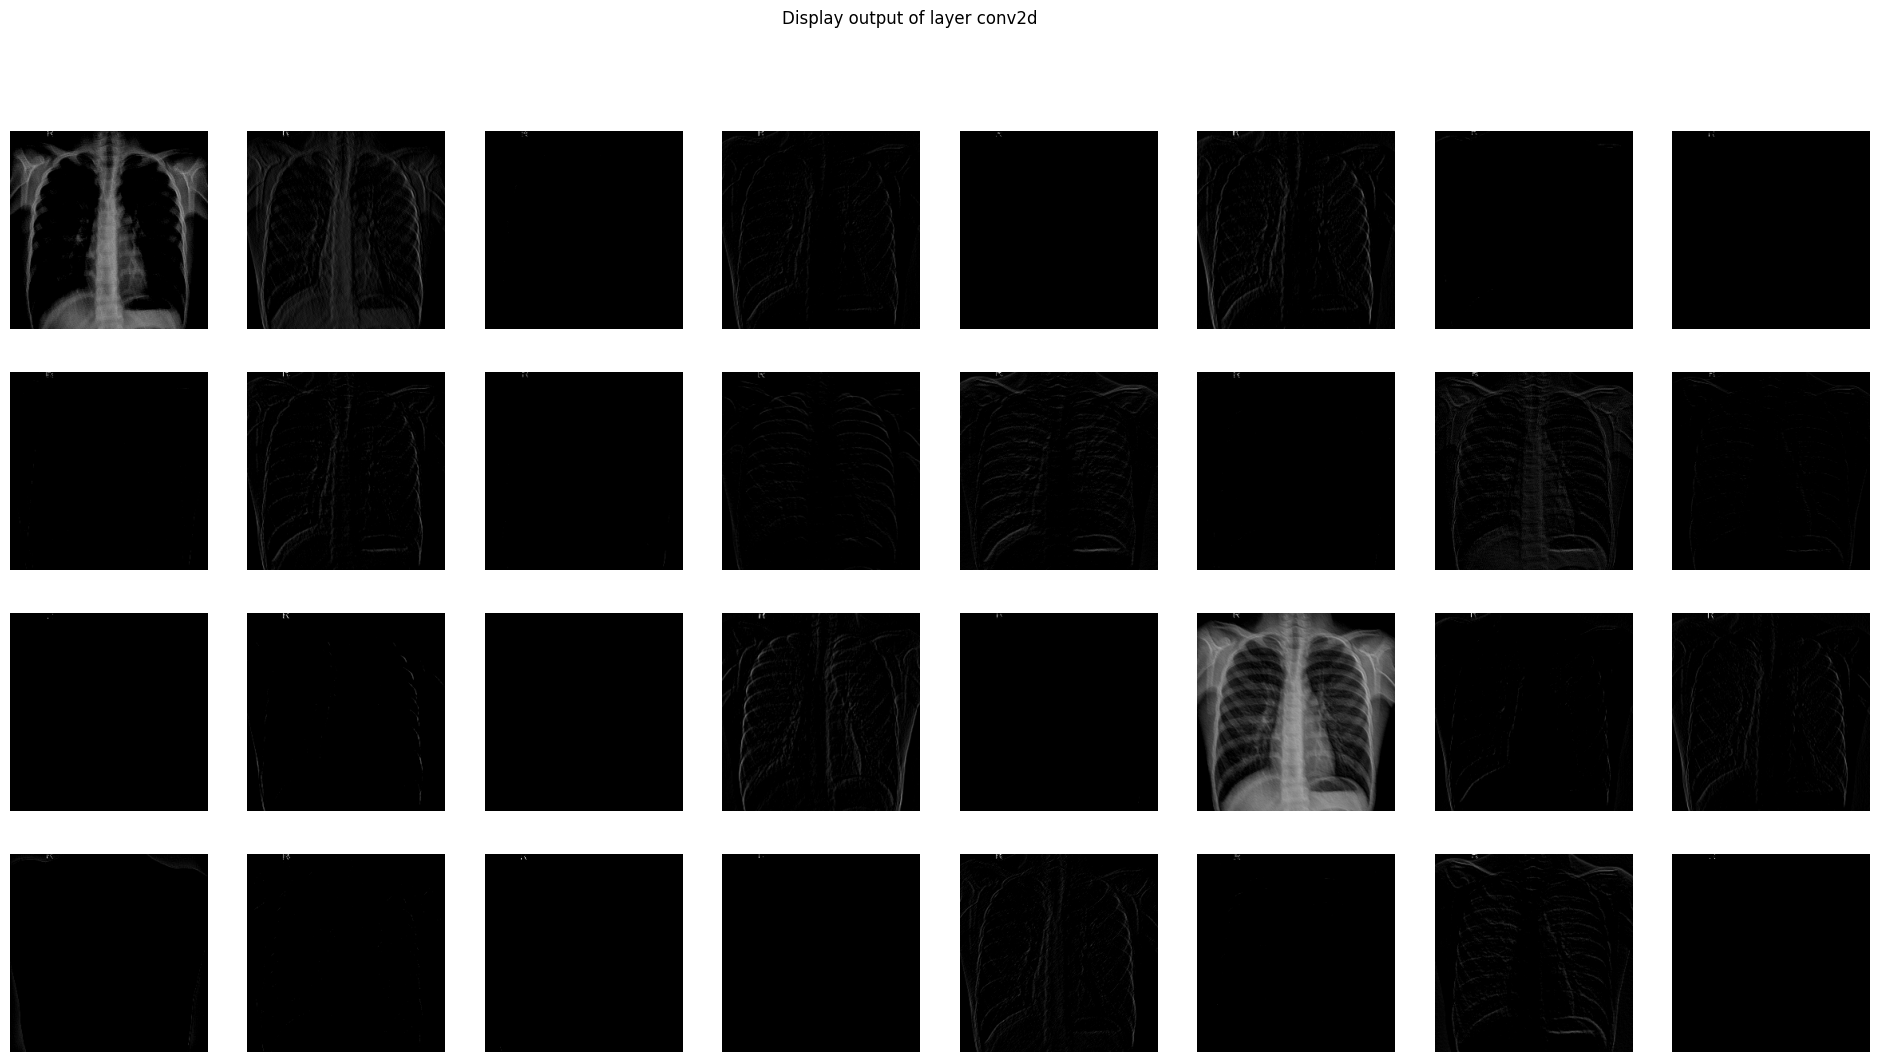

In [11]:
def display_first_layer_outputs_of_normal_img(model) -> None:
    base_tested_dir = join(base_dir, join("test", "NORMAL"))
    tested_image_name = "IM-0007-0001.jpeg"
    img_path = join(base_tested_dir, tested_image_name)
    display_layer_outputs_of_image(model, img_path, 'conv2d')
display_first_layer_outputs_of_normal_img(q1_a_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


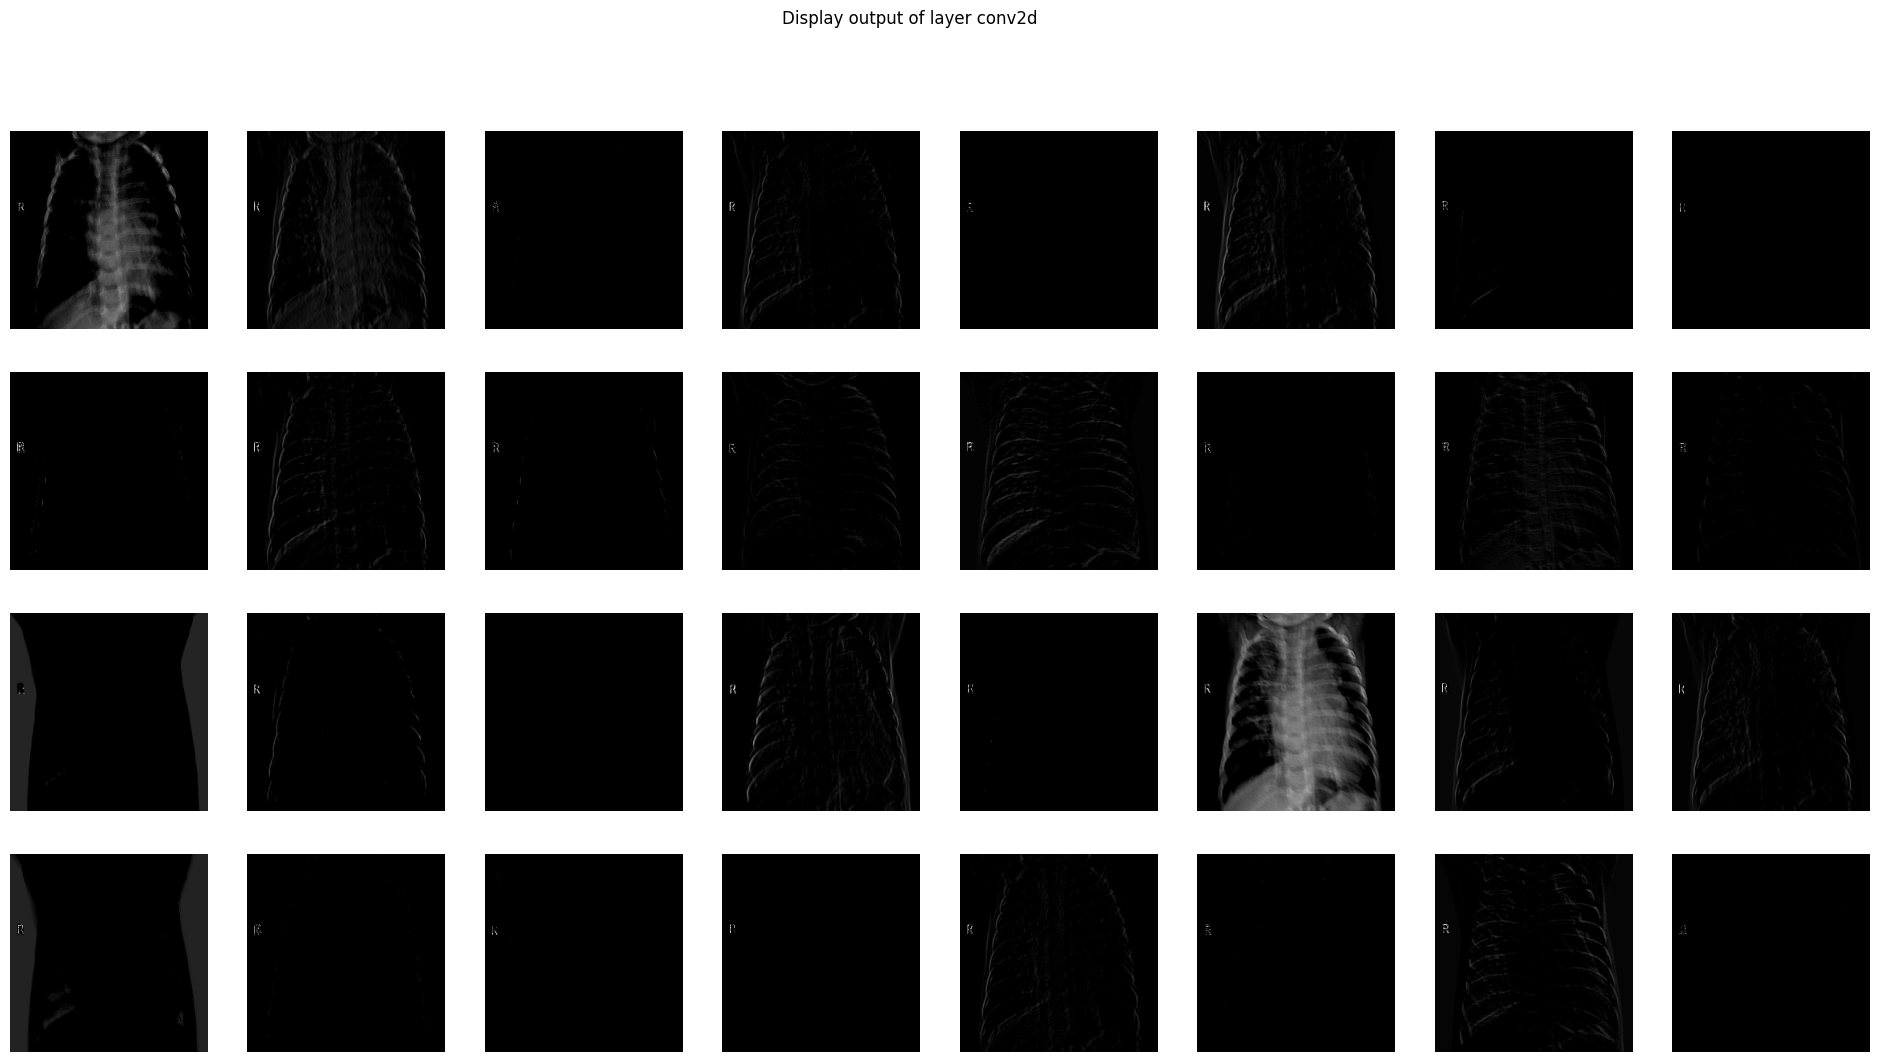

In [13]:
def display_first_layer_outputs_of_bacteria_img(model) -> None:
    base_tested_dir = join(base_dir, join("test", "PNEUMONIA"))
    tested_image_name = "person91_bacteria_448.jpeg"
    img_path = join(base_tested_dir, tested_image_name)
    display_layer_outputs_of_image(model, img_path, 'conv2d')
display_first_layer_outputs_of_bacteria_img(q1_a_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


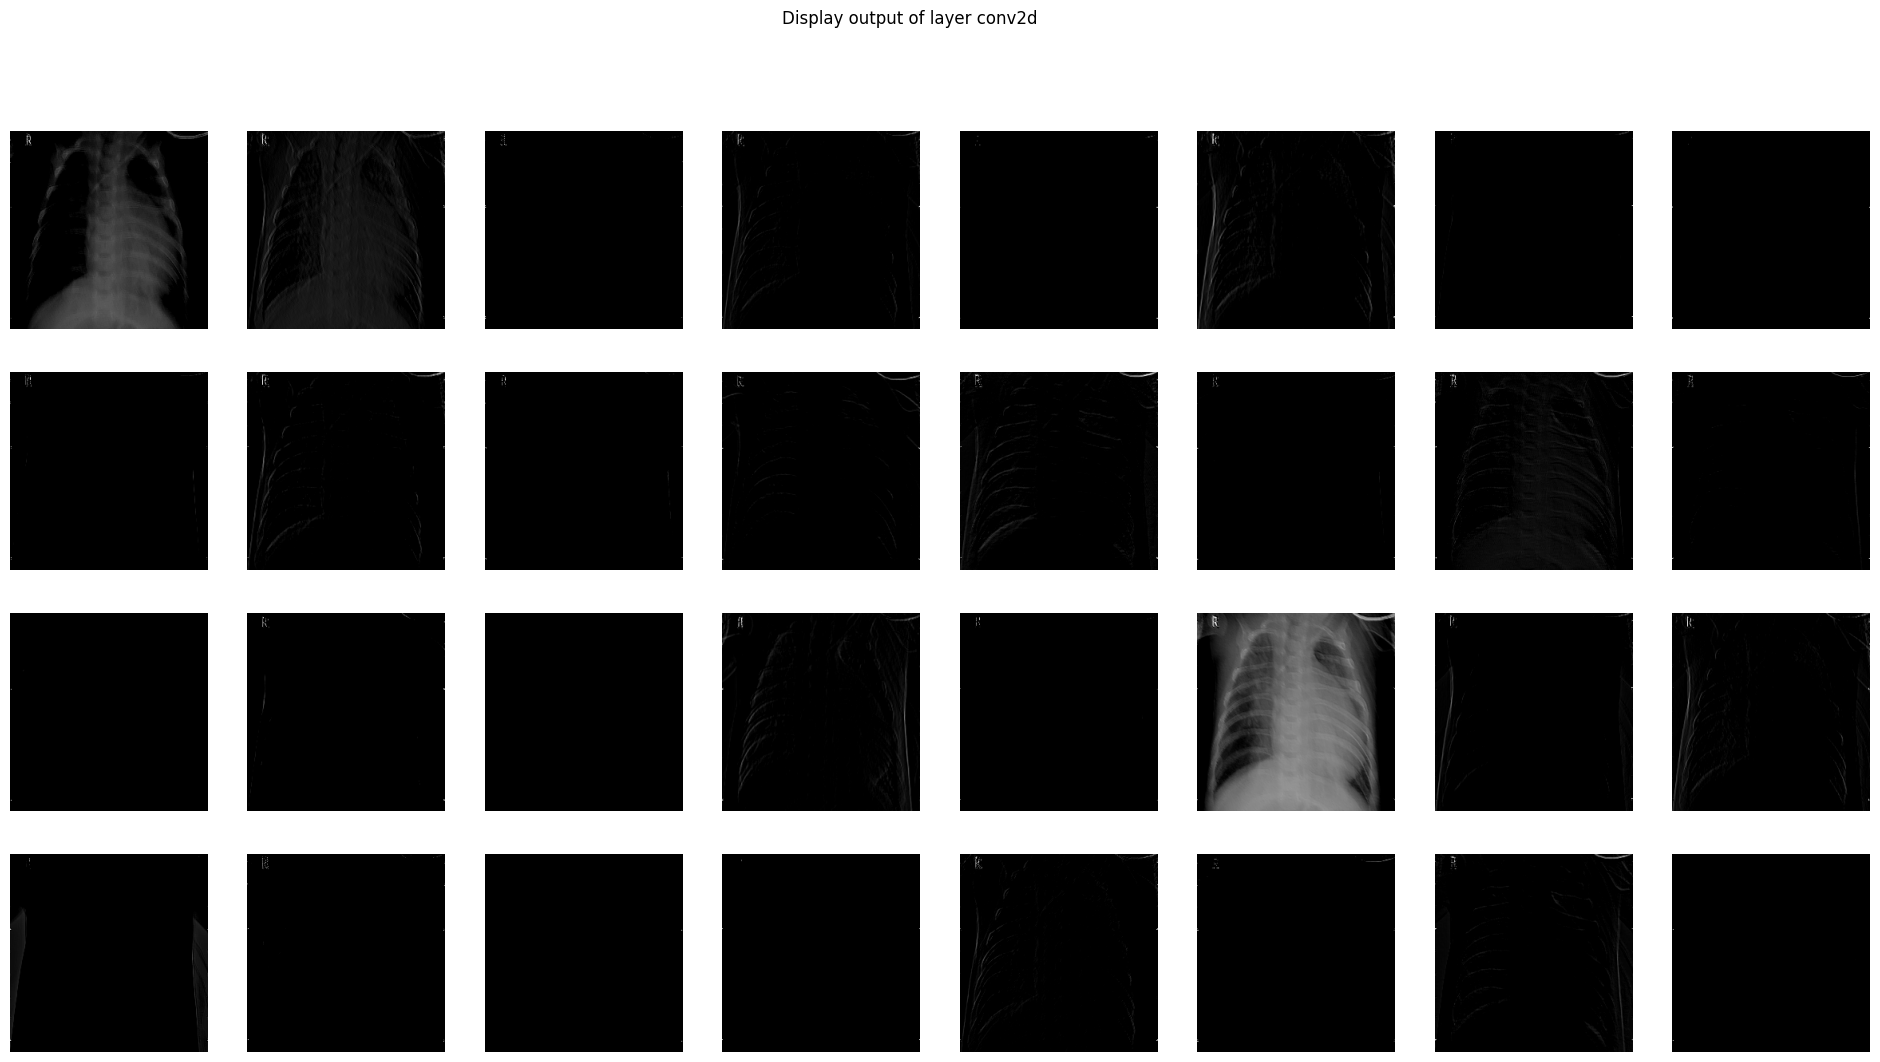

In [14]:
def display_first_layer_outputs_of_virus_img(model) -> None:
    base_tested_dir = join(base_dir, join("test", "PNEUMONIA"))
    tested_image_name = "person1_virus_11.jpeg"
    img_path = join(base_tested_dir, tested_image_name)
    display_layer_outputs_of_image(model, img_path, 'conv2d')
display_first_layer_outputs_of_virus_img(q1_a_model)

### Second layer outputs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


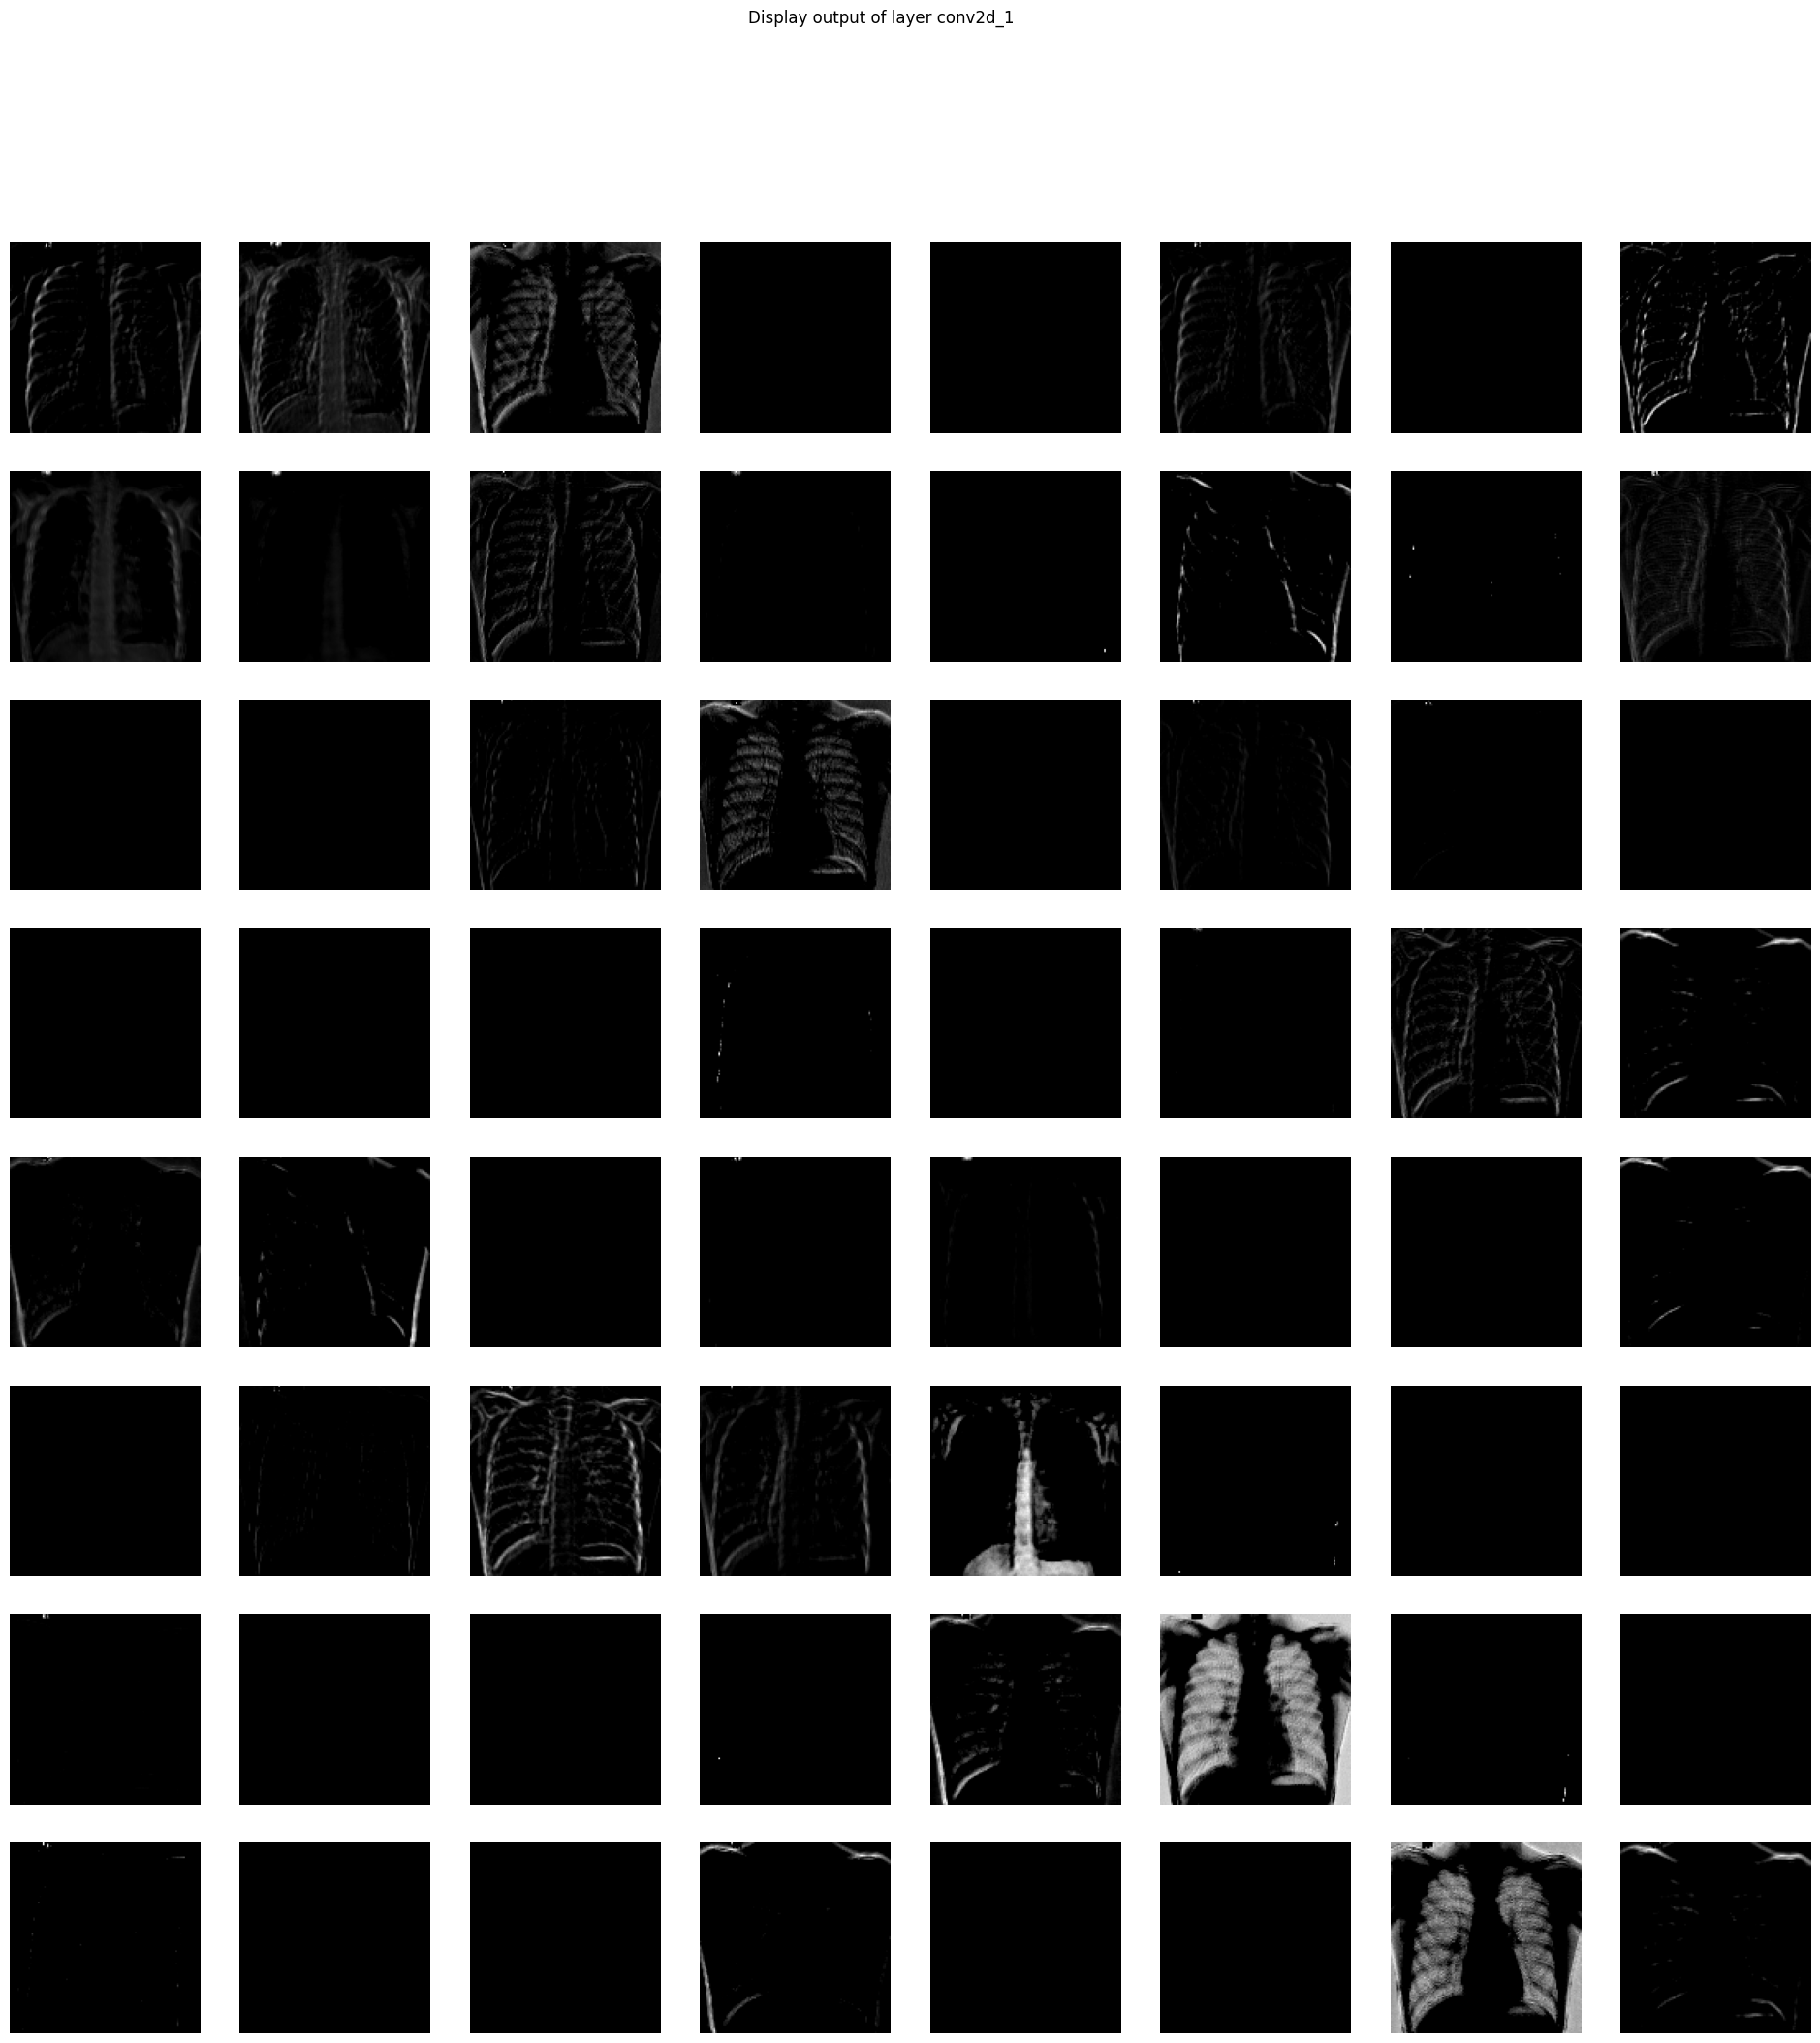

In [15]:
def display_second_layer_outputs_of_normal_img(model) -> None:
    base_tested_dir = join(base_dir, join("test", "NORMAL"))
    tested_image_name = "IM-0007-0001.jpeg"
    img_path = join(base_tested_dir, tested_image_name)
    display_layer_outputs_of_image(model, img_path, 'conv2d_1')
display_second_layer_outputs_of_normal_img(q1_a_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


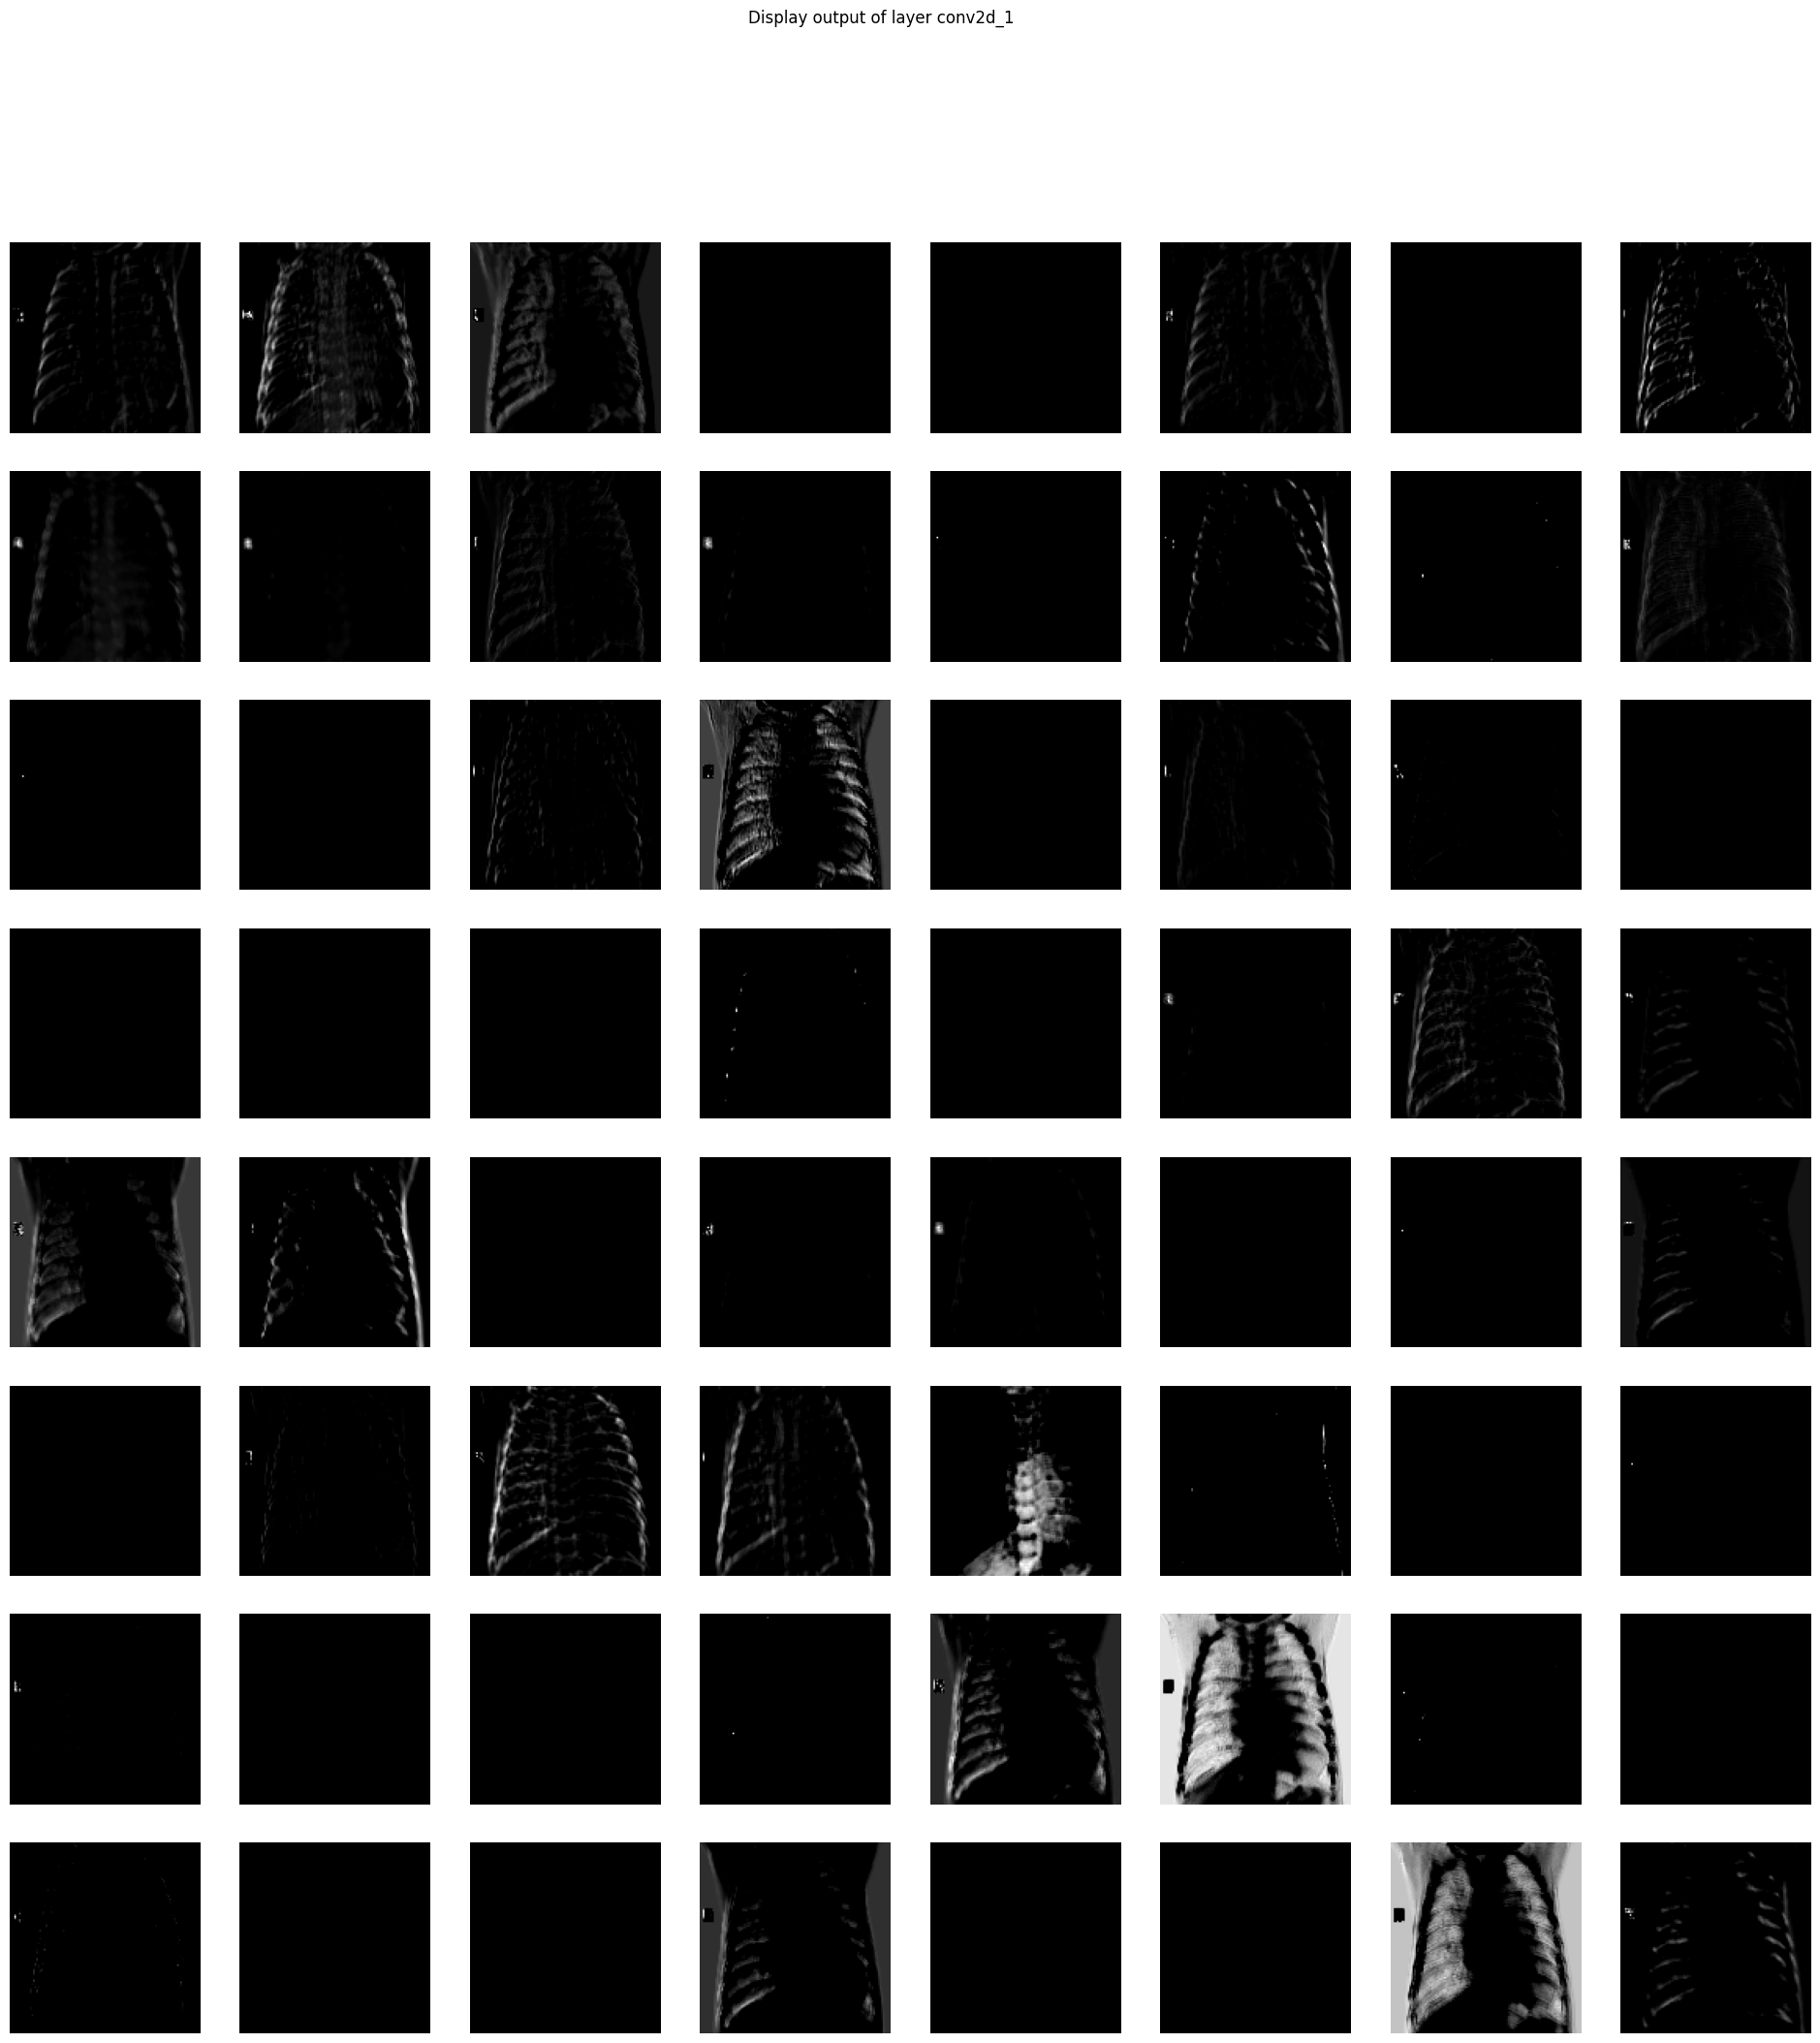

In [16]:
def display_second_layer_outputs_of_bacteria_img(model) -> None:
    base_tested_dir = join(base_dir, join("test", "PNEUMONIA"))
    tested_image_name = "person91_bacteria_448.jpeg"
    img_path = join(base_tested_dir, tested_image_name)
    display_layer_outputs_of_image(model, img_path, 'conv2d_1')
display_second_layer_outputs_of_bacteria_img(q1_a_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


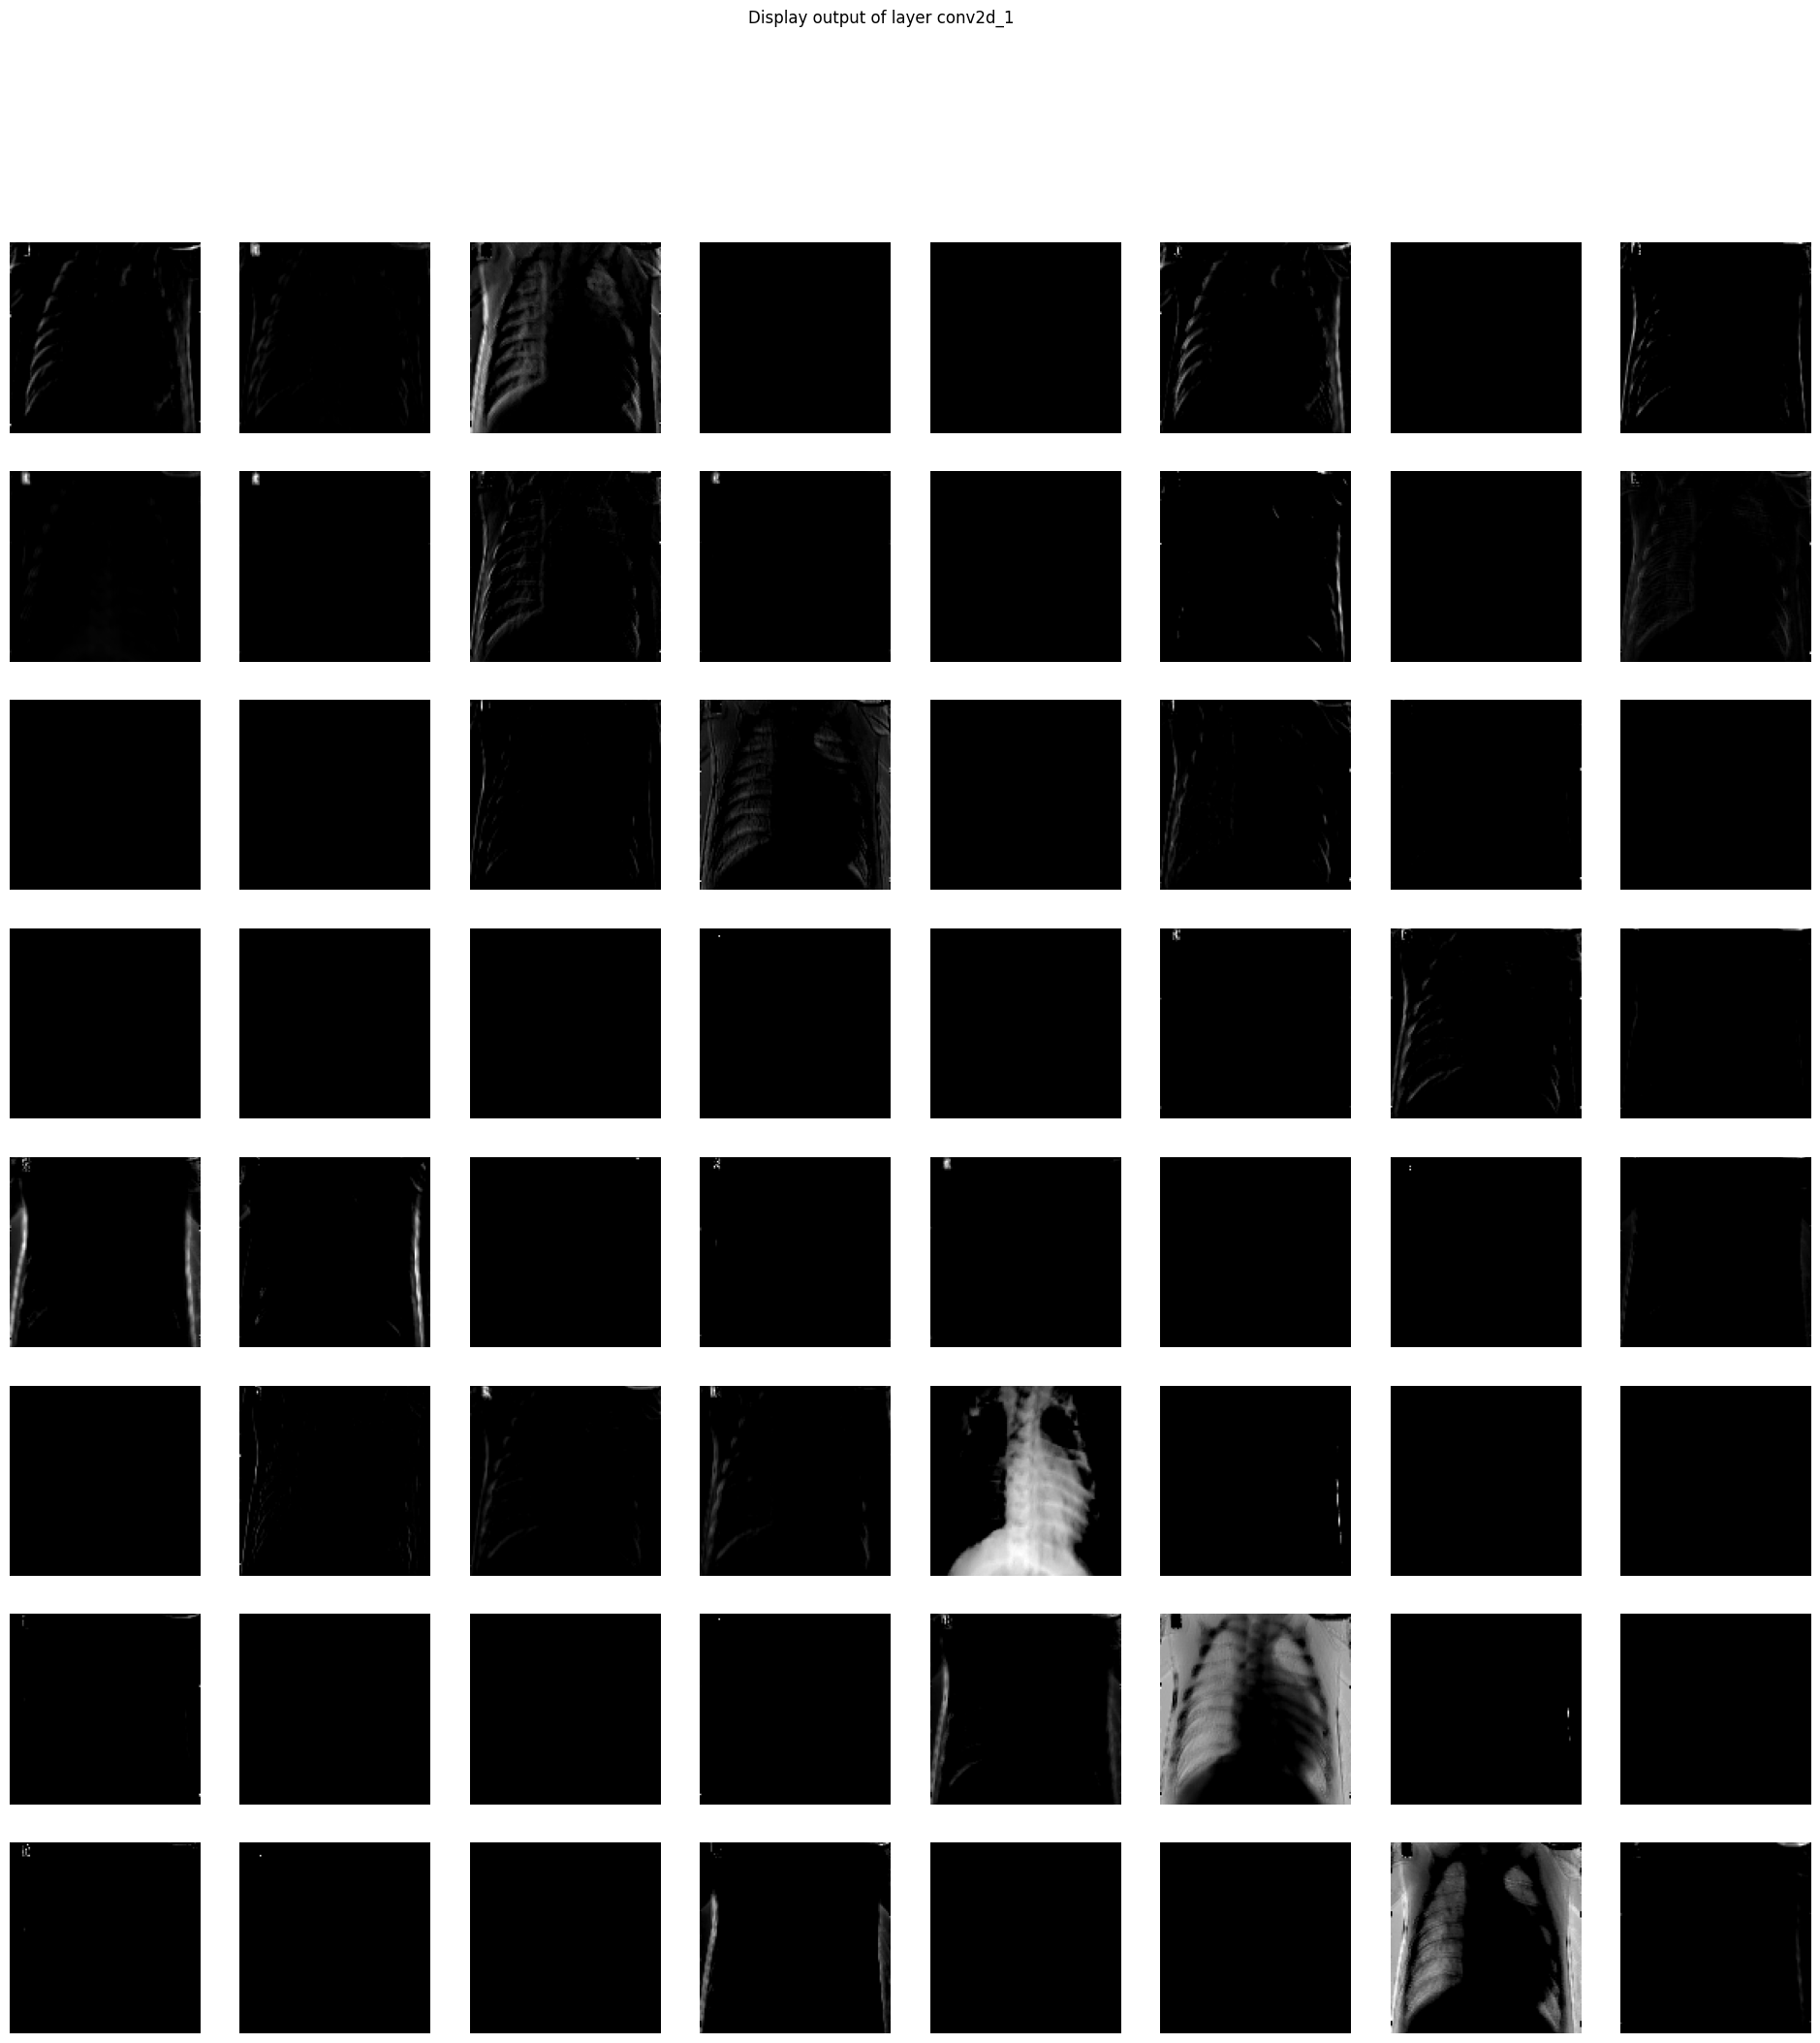

In [17]:
def display_second_layer_outputs_of_virus_img(model) -> None:
    base_tested_dir = join(base_dir, join("test", "PNEUMONIA"))
    tested_image_name = "person1_virus_11.jpeg"
    img_path = join(base_tested_dir, tested_image_name)
    display_layer_outputs_of_image(model, img_path, 'conv2d_1')
display_second_layer_outputs_of_virus_img(q1_a_model)

## Play with Heatmap

Collect an image patches, where eatch patch is the image without the filter area (filled with zeroes)

In [18]:
def patch_images(orig_image, patch_size: int, stride: int):
    patches = []
    for counter, row in enumerate(range(0, orig_image.shape[0] - patch_size + 1, stride)):
        for col in range(0, orig_image.shape[1] - patch_size + 1, stride):
            edited_image = np.array(orig_image)
            edited_image[row: row + patch_size, col: col + patch_size] = 0
            patches.append(edited_image)
    return np.array(patches)

Create an heatmap image

In [19]:
def evaluate_heatmap_from_image(model, image: np.ndarray, orig_pred: float, patch_size: int, stride: int) -> np.ndarray:
    patched_images = patch_images(image, patch_size, stride)
    pred_results = model.predict(patched_images)
    mse_results = np.mean(np.square(pred_results - orig_pred), axis=1)
    mse_results_as_img_shape = np.array(mse_results).reshape((
        int((image.shape[0] - patch_size) / stride) + 1,
        int((image.shape[1] - patch_size) / stride) + 1
    ))
    heatmap_img = resize(mse_results_as_img_shape, (image.shape[0], image.shape[1]))
    return heatmap_img

Load image and make prediction according to this image

In [22]:
def get_image_and_prediction(model, img_path: str) -> tuple[list, float]:
    img = load_img(img_path, target_size=(model.inputs[0].shape[1], model.inputs[0].shape[2])).convert('L')
    img = img_to_array(img)
    tensor_img = np.expand_dims(img, axis=0)
    img /= 255.
    prediction = model.predict(tensor_img)
    return img, prediction

Get files names for heatmap

In [23]:
def get_image_filenames() -> list:
    img_paths = []
    filenames_normal = ["IM-0093-0001.jpeg", "IM-0007-0001.jpeg", "NORMAL2-IM-0278-0001.jpeg"]
    for filename in filenames_normal:
        img_paths.append(join(join(base_dir, join("test", "NORMAL")), filename))
    filenames_bacteria = ["person141_bacteria_676.jpeg", "person147_bacteria_706.jpeg", "person145_bacteria_696.jpeg"]
    for filename in filenames_bacteria:
        img_paths.append(join(join(base_dir, join("test", "PNEUMONIA")), filename))
    filenames_virus = ["person3_virus_16.jpeg", "person44_virus_93.jpeg", "person45_virus_95.jpeg"]
    for filename in filenames_virus:
        img_paths.append(join(join(base_dir, join("test", "PNEUMONIA")), filename))
    return img_paths

Collect the heatmaps of images.

In [24]:
def get_heatmaps_collection(model, img_paths: list) -> list:
    heatmap_images = []
    for img_path in img_paths:
        image, image_prediction = get_image_and_prediction(model, img_path)
        filter_size = 15
        stride_size = 3
        hitmap_image = evaluate_heatmap_from_image(model, image, image_prediction, filter_size, stride_size)
        heatmap_images.append((image, hitmap_image))
    return heatmap_images

Plot heatmap from heatmap collections

In [64]:
def plot_heatmap(heatmap_images: list) -> None:
    height_size = 3
    width_size = int(len(heatmap_images) / height_size)

    fig, ax = plt.subplots(height_size, width_size, figsize=(width_size * 3, height_size * 3))
    for height_idx in range(height_size):
        for width_idx in range(width_size):
            hitmap_tuple = heatmap_images[height_idx * width_size + width_idx]
            ax[height_idx, width_idx].imshow(hitmap_tuple[0])
            ax[height_idx, width_idx].imshow(hitmap_tuple[1], cmap='jet', alpha=0.5)
            ax[height_idx, width_idx].axis('off')
    plt.show()

The main run for heatmap.<br>
We can see in result the 3 rows:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The first is for normal<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The second is for bacteria<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The third is for virus<br>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step


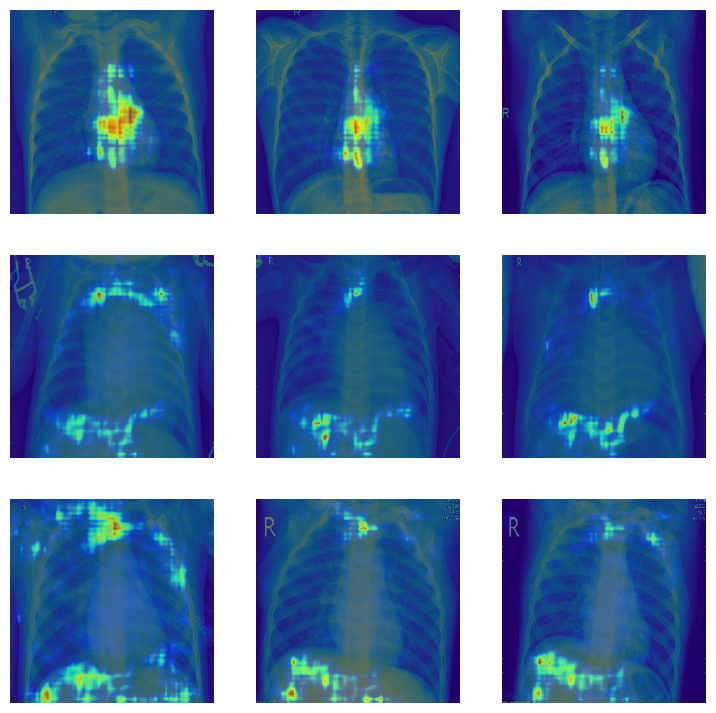

In [26]:
def run_heatmap(model):
    img_paths = get_image_filenames()
    heatmap_images = get_heatmaps_collection(model, img_paths)
    plot_heatmap(heatmap_images)
run_heatmap(q1_a_model)